In [4]:
import numpy as np
'''
All  functions  accept inputs as SI(Système International d'Unités,or International Standard Units in English)
e.g:meter,kilogram,second.
'''
timeinterval = 0.001
Gvalue = 6.67408e-11
time = 0.00

class _3DVector:
    """docstring for __3DVector"""
    def __init__(self, X,Y,Z):
        self.x = float(X)
        self.y = float(Y)
        self.z = float(Z)

    def __add__(self,other):
        if other.__class__.__name__ == "_3DVector":
            return _3DVector(float(self.x+other.x),float(self.y+other.y),float(self.z+other.z))
        else:
            return 	_3DVector(float(self.x+other),float(self.y+other),float(self.z+other))

    def __sub__(self,other):
        if other.__class__.__name__ == "_3DVector":
            return _3DVector(float(self.x-other.x),float(self.y-other.y),float(self.z-other.z))
        return 	_3DVector(float(self.x-other),float(self.y-other),float(self.z-other))

    def __iadd__(self,other):
        if other.__class__.__name__=="_3DVector":
            self.x+=other.x
            self.y+=other.y
            self.z+=other.z
            return
        self.x+=other
        self.y+=other
        self.z+=other
        return	

    def __isub__(self,other):
        if other.__class__.__name__=="_3DVector":
            self.x-=other.x
            self.y-=other.y
            self.z-=other.z
            return
        self.x-=other
        self.y-=other
        self.z-=other
        return	

    def __mul__(self,other):	
        if other.__class__.__name__!="_3DVector":
            return _3DVector(float(self.x*other),float(self.y*other),float(self.z*other))
        else:
            return _3DVector(0.0,0.0,0.0)

    def __imul__(self,other):
        if other.__class__.__name__!="_3DVector":
            self.x*=other
            self.y*=other
            self.z*=other
            return
        return False

    def __pow__(self,other):
        if other==2:
            return np.square(self.x)+np.square(self.y)+np.square(self.z)
        if other>=2:
            return (self**2)*(other//2)+other%2*self
        pass

    def __div__(self,other):
        if (other.__class__.__name__!="_3DVector")&(other!=0):
            return _3DVector(self.x/other,self.y/other,self.z/other)
        return False

    def __eq__(self,other):
        if other.__class__.__name__=="_3DVector":
            self.x = other.x
            self.y = other.y
            self.z = other.z
            return
        return
class Star:
    """docstring for Star"""
    def __init__(self,xPos,yPos,zPos,mass):
        self.Pos = _3DVector(xPos,yPos,zPos)
        self.Spd = _3DVector(0.00,0.00,0.00)
        self.Gravity = _3DVector(0.00,0.00,0.00)
        self.Accelarate = _3DVector(0.00,0.00,0.00)
        self.Mass = float(mass)
        self.Route= [_3DVector(xPos,yPos,zPos)]

    def GravityCalc(self,*stars):
        grav = _3DVector(0,0,0)
        for s in stars:
            self.Gravity = self.Gravity+(Gvalue*(s.Mass*self.Mass))/(self.Pos-s.Pos)**2
        self.Gravity = grav

    def SpdCalc(self):
        self.Accelarate = self.Gravity/self.Mass
        self.Spd += self.Accelarate

    def RK4PosCalc(self):
        deltaTime = 0.00000000000000000000001
        self.Pos = self.Pos+self.Gravity
        self.Pos = self.Pos+deltaTime/6*(self.Spd+2*(self.Spd+deltaTime/2*self.Accelarate)+2*deltaTime*(self.Spd+deltaTime/2*self.Accelarate)+2*deltaTime**2*(self.Spd+deltaTime/2*self.Accelarate))
        self.Route.append(self.Pos)

def ThreeBodyRoute(time,s1,s2,s3):
    for x in range(1,int(time/timeinterval)):
        s1.GravityCalc(s2,s3)
        s2.GravityCalc(s1,s3)
        s3.GravityCalc(s1,s2)
        s1.SpdCalc()
        s2.SpdCalc()
        s3.SpdCalc()
        s1.RK4PosCalc()
        s2.RK4PosCalc()
        s3.RK4PosCalc()
    print(s1.Route)


s1 = Star(1000,20000,30000,100000000000)
s2 = Star(1000,2000,3000,600000000000)
s3 = Star(10000,20000,30000,300000000000)
ThreeBodyRoute(10,s1,s2,s3)

TypeError: unsupported operand type(s) for /: '_3DVector' and 'float'

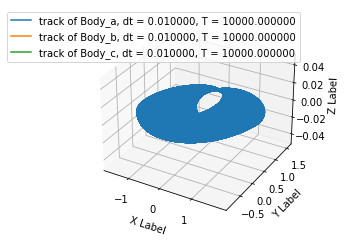

In [5]:
import os
import numpy
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
G = 1.0

def calRstenF(F1,F2):
	F = F1
	F['x'] = F1['x'] + F2['x']
	F['y'] = F1['y'] + F2['y']
	F['z'] = F1['z'] + F2['z']
	return F
def calStatus(body,F,dt):
	body_new = body
	body_new['vx'] = F['x']/body_new['m']*dt + body['vx']
	body_new['vy'] = F['y']/body_new['m']*dt + body['vy']
	body_new['vz'] = F['z']/body_new['m']*dt + body['vz']
	body_new['x'] = (body_new['vx'] + body['vx'])*dt/2 + body['x']
	body_new['y'] = (body_new['vy'] + body['vy'])*dt/2 + body['y']
	body_new['z'] = (body_new['vz'] + body['vz'])*dt/2 + body['z']
	body_new['t'] = dt + body['t']
	return body_new
def calF(body1,body2):
	r_vect = {'x':body1['x'] - body2['x'],'y':body1['y'] - body2['y'],'z':body1['z'] - body2['z']}
	r_dist = (r_vect['x']**2 + r_vect['y']**2 +r_vect['z']**2 )**0.5
	F_scale = G*body1['m']*body2['m']/r_dist**2
	F12 = {'x':F_scale*r_vect['x']/r_dist,'y':F_scale*r_vect['y']/r_dist,'z':F_scale*r_vect['z']/r_dist,'t':body1['t']}
	return F12

def GetTrack(Track,body):
	Track['x'].append(body['x'])
	Track['y'].append(body['y'])
	Track['z'].append(body['z'])
	Track['t'].append(body['t'])
	return Track

def plotTrack(B,ax,lab):
	x, y, z = B['x'],B['y'],B['z']
	ax.plot(x, y, z,label = lab)


B_origin = {'m':1.0,'x':0.0,'y':0.0,'z':0.0,'vx':0.0,'vy':0.0,'vz':0.0,'t':0.0,'name':''}
F = {'x':0.0,'y':0.0,'z':0.0,'t':0.0}
Ba,Bb,Bc = B_origin.copy(),B_origin.copy(),B_origin.copy()
#print Ba,Bb,Bc
Ba['x'] = 1.0
Ba['vx'] = 0.7

Bb['y'] = 1.0
#Bc['z'] = 1.0
Bc['m'] = 0.0
Ba['name'] = 'a'
Bb['name'] = 'b'
Bc['name'] = 'c'
#print Ba,Bb,Bc

dt = 0.01
T = 10000
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
Track_a = {'x':[],'y':[],'z':[],'t':[]}
Track_b = {'x':[],'y':[],'z':[],'t':[]}
Track_c = {'x':[],'y':[],'z':[],'t':[]}



for N in range(1,int(T/dt)):
	Fa = calRstenF(calF(Bb,Ba),calF(Bc,Ba))
	Fb = calRstenF(calF(Ba,Bb),calF(Bc,Bb))
	#Fc = calRstenF(calF(Ba,Bc),calF(Bb,Bc))
	Fc = F
	Ba = calStatus(Ba,Fa,dt)
	#Bb = calStatus(Bb,Fb,dt)
	#Bc = calStatus(Bc,Fc,dt)
	Track_a = GetTrack(Track_a,Ba)
	Track_b = GetTrack(Track_b,Bb)
	Track_c = GetTrack(Track_c,Bc)

	#print (Ba['x'],Ba['y'],Ba['z'])
plotTrack(Track_a, ax,'track of Body_a, dt = %f, T = %f'%(dt,T))
plotTrack(Track_b, ax,'track of Body_b, dt = %f, T = %f'%(dt,T))
plotTrack(Track_c, ax,'track of Body_c, dt = %f, T = %f'%(dt,T))
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [7]:
'''
Units
time = years
distance = AU
'''

import math
import plotly
import plotly.graph_objs as go

# CONSTANTS
start_pos_1 = (1, 0)
start_vel_1 = (0, 6.28)  # Starting velocity of Earth needed for circular orbit
start_pos_2 = (5.2, 0)  # Jupiter average distance from sun
start_vel_2 = (0, 6.28*5.2/12)  # Starting velocity of Jupiter for almost circular orbit
mass_1 = 0.0001185538  # Earth relative coefficient to sun (4pi^2) in AU^3/years^2
mass_2 = 0.0377001105 * 100 # Jupiter relative coefficient to sun (4pi^2) in AU^3/years^2
duration = 12

class Kinematic:
    px = 0
    py = 0
    vx = 0
    vy = 0
    def __init__(self, pos_x, pos_y, vel_x, vel_y):
        self.px = pos_x
        self.py = pos_y
        self.vx = vel_x
        self.vy = vel_y

planet1 = [Kinematic(start_pos_1[0], start_pos_1[1], start_vel_1[0], start_vel_1[1])]
planet2 = [Kinematic(start_pos_2[0], start_pos_2[1], start_vel_2[0], start_vel_2[1])]

dt = 0.001  # time step
steps = int(duration/dt)

for t in range(0, steps, 1):
    r1 = math.sqrt(planet1[t].px ** 2 + planet1[t].py ** 2)
    r2 = math.sqrt(planet2[t].px ** 2 + planet2[t].py ** 2)
    r12 = math.sqrt((planet1[t].px - planet2[t].px) ** 2 + (planet1[t].py - planet2[t].py) ** 2)

    vx = planet1[t].vx - 4 * math.pi ** 2 * planet1[t].px * dt / (r1 ** 3) - mass_2 * (planet1[t].px - planet2[t].px) * dt / (r12 ** 3)
    vy = planet1[t].vy - 4 * math.pi ** 2 * planet1[t].py * dt / (r1 ** 3) - mass_2 * (planet1[t].py - planet2[t].py) * dt / (r12 ** 3)

    px = planet1[t].px + vx * dt
    py = planet1[t].py + vy * dt

    planet1.append(Kinematic(px, py, vx, vy))

    vx2 = planet2[t].vx - 4 * math.pi ** 2 * planet2[t].px * dt / (r2 ** 3) - mass_1 * (planet2[t].px - planet1[t].px) * dt / (r12 ** 3)
    vy2 = planet2[t].vy - 4 * math.pi ** 2 * planet2[t].py * dt / (r2 ** 3) - mass_1 * (planet2[t].py - planet1[t].py) * dt / (r12 ** 3)

    px2 = planet2[t].px + vx2 * dt
    py2 = planet2[t].py + vy2 * dt

    planet2.append(Kinematic(px2, py2, vx2, vy2))


graph1_x = []
graph1_y = []
color1 = []
graph2_x = []
graph2_y = []

i = 0
j = 0

for k in planet1:
    graph1_x.append(k.px)
    graph1_y.append(k.py)
    color1.append(j)
    i += 1
    if i > (duration/dt)/512:
        j += 1
        i = 0

for k in planet2:
    graph2_x.append(k.px)
    graph2_y.append(k.py)

trace_planet1 = go.Scatter(
    x = graph1_x,
    y = graph1_y,
    marker=dict(
        size=2,
        cmax=512,
        cmin=0,
        color=color1,
        colorbar=dict(
            title='Colorbar'
        ),
        colorscale='Viridis'
    ),
    mode='markers',
    name = 'Earth'
)

trace_planet2 = go.Scatter(
    x = graph2_x,
    y = graph2_y,
    mode = 'lines',
    name = 'Jupiter'
)

graph = [trace_planet1, trace_planet2]

layout = go.Layout(
    xaxis=dict(
        range=[-14, 14]
    ),
    yaxis=dict(
        range=[-6, 6]
    )
)

fig = go.Figure(data=graph, layout=layout)

plot_url = plotly.offline.plot(fig, filename='orbit.html')

In [ ]:
from vpython import *
from numba import jit
import numpy as np
import time
### Defining constants for ease of conversion
G = 6.67*10**(-11) # m^3/(kg*s^2)
AU = 1.496*10**11 # m

### Defining time intervals in seconds
HOUR = 3600 # s
DAY = 86400 # s
YEAR = 3.154*10**7 # s

on = True
running = True
time=0

scene.width = 1000
scene.height = 1000


### Planetary data importing
mercury_data = [0.39*AU, 48236, 3.3*10**23]
venus_data = [0.723*AU, 35008, 4.87*10**24]
earth_data = [AU, 29784, 5.98*10**24]
mars_data = [1.524*AU, 24134, 6.42*10**23]
jupiter_data = [5.203*AU, 13072, 1.90*10**27]
saturn_data = [9.539*AU, 9651, 5.69*10**26]
uranus_data = [19.18*AU, 6799, 8.68*10**25]
neptune_data = [30.06*AU, 5435, 1.02*10**26]

def angular_speed(mass, radius):
    # Defining a function to find the angular speed of something given mass 
    # and distance between objects.
    return np.sqrt(G*mass/r**3)

def find_speed(x,y,z):
    # Defining a function to find the speed of something given x,y and z 
    # velocities
    speed=float(( x**2 + y**2 + z**2)**0.5)
    return speed

def pause_play():
    # Defining a function to be used with a button in vpython to pause/play
    # the simulation as decided by the user.
    global running
    if running == True:
        running = False
    else: running = True


### Creating axis markers for reference
xaxis=cylinder(pos=vector(-2*AU,0,0), axis=vector(4*AU,0,0), radius=0.01*AU)
yaxis=cylinder(pos=vector(0,-2*AU,0), axis=vector(0,4*AU,0), radius=xaxis.radius)
zaxis=cylinder(pos=vector(0,0,-2*AU), axis=vector(0,0,4*AU), radius=xaxis.radius)
scene.background = color.black
[distant_light(direction=vector( 0.22,  0.44,  0.88), color=color.gray(0.8)),
 distant_light(direction=vector(-0.88, -0.22, -0.44), color=color.gray(0.3))]
local_light(pos=vector(0,0,0), color=color.yellow)
scene.range=100*AU

scene.width = 1000
      
MASS= 1.988*10**(30) # kg, 1 solar mass
MASS_POS = np.array([0,0,0])

def force_grav(mass_1, pos_1, mass_2, pos_2):
    # Calculating a vector force on an object due to the graviational force of
    # another object
    distance = np.sqrt((pos_1.x-pos_2.x)**2 + (pos_1.y-pos_2.y)**2 + 
                       (pos_1.z-pos_2.z)**2)

    force = -G*mass_1*mass_2/(distance)**2
    force_vector = np.array([force*((pos_1.x-pos_2.x)/distance), 
                             force*((pos_1.y-pos_2.y)/distance), 
                             force*((pos_1.z-pos_2.z)/distance)])

    return force_vector

def off():
    # Function corresponding to the stop button, which allows the user to stop
    # the simulation.
    global on
    on = False

def pos_change(a, v, pos, ):
    # Function used to numerically calculate the change in position and velocity
    # due to the forces acting upon it.
    v.x = v.x + step*a[0]
    pos.x = pos.x + step * v.x
    v.y = v.y + step*a[1]
    pos.y = pos.y + step * v.y
    v.z = v.z + step*a[2]
    pos.z = pos.z + step * v.z     
    
    return v, pos

### Defining the speeds, positions and visual sizes of the stars
star_1 = sphere(pos=vector(80*AU,20*AU,5*AU), radius=2*AU, color=color.yellow)
star_1.velocity = vector(0,-13500,0)
star_2 = sphere(pos=vector(100*AU,32*AU,16*AU), radius=2*AU, color=color.yellow)
star_2.velocity = vector(0,27000,0)
star_3 = sphere(pos=vector(0,0,0), radius=2*AU, color=color.yellow)
star_3.velocity = vector(10000,10000,0)


### Defining the mass of each star
mass_1 = 72*MASS
mass_2 = 64*MASS
mass_3 = 20*MASS


graph(width=400, height=250)
xDots = gdots(color=color.green)
yDots = gdots(color=color.magenta)
zDots = gdots(color=color.red)

def focus1():
    scene.center=star_1.pos
def focus2():
    scene.center=star_2.pos
def focus3():
    scene.center=star_3.pos



button(text="Pause/Play", bind=pause_play)
button(text="Stop", bind=off)
scene.append_to_caption("\n\n")
button(text="Focus on Object 1", bind=focus1)
button(text="Focus on Object 2", bind=focus2)
button(text="Focus on Object 3", bind=focus3)

def adjust_mass_1():
    # Function associated with a slider to be used by the user to change the
    # value of star 1's mass mid or pre simulation.
    global mass_1
    mass_1 = 72*MASS + massSlider.value*10*MASS
    star_1.radius = star_2.radius*(massSlider.value)/45

massSlider = slider(left=10, min=0, max=90, step=1, value=45,
bind=adjust_mass_1)

time=0
    

### While loop used to run the simulation, and pause/play and stop as per user 
### input.
while on == True:
    while running == True:
        rate(500)
        step = DAY
    
        a_1 = (force_grav(mass_1, star_1.pos, mass_2, star_2.pos) + force_grav(
                mass_1, star_1.pos, mass_3, star_3.pos))/mass_1
        star_1.velocity, star_1.pos = pos_change(a_1, star_1.velocity, 
                                                 star_1.pos)
        a_2 = (force_grav(mass_2, star_2.pos, mass_1, star_1.pos) + force_grav(
                mass_2, star_2.pos, mass_3, star_3.pos))/mass_2
        star_2.velocity, star_2.pos = pos_change(a_2, star_2.velocity, 
                                                 star_2.pos)
        a_3 = (force_grav(mass_3, star_3.pos, mass_2, star_2.pos) + force_grav(
                mass_3, star_3.pos, mass_1, star_1.pos))/mass_3
        star_3.velocity, star_3.pos = pos_change(a_3, star_3.velocity, 
                                                 star_3.pos)
        speed_1 = find_speed(star_1.velocity.x, star_1.velocity.y, 
                             star_1.velocity.z)
        speed_2 = find_speed(star_2.velocity.x, star_2.velocity.y, 
                             star_2.velocity.z)
        speed_3 = find_speed(star_3.velocity.x, star_3.velocity.y, 
                             star_3.velocity.z)
        
        
        time+=1